In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Задание 1.

1) Постройте диаграмму рассеивания и проанализируйте ее с точки зрения наличия и характера связи между компонентами выборочного вектора. Оправдано ли для описания зависимости использовать модель $Y = \beta_0 + \beta_1 x + \beta_2 x^2 + E$? Если вы считаете, что не оправдано, то для выполнения следующих заданий используйте иную линейную регрессионную модель общего вида (но обязательно отличную от модели, рассмотренной в практической работе № 11).  

2) Считая, что $M [Y|x] = \beta_0 + \beta_1 x + \beta_2 x^2$, найдите оценки параметров модели $y = \beta_0 + \beta_1 x + \beta_2 x^2 $ (непосредственно по формулам, без использования специализированных функций языка программирования Python).

3) Нанесите график построенного в п. 2 уравнения регрессии на
диаграмму рассеивания.

## ***Пункт 1***

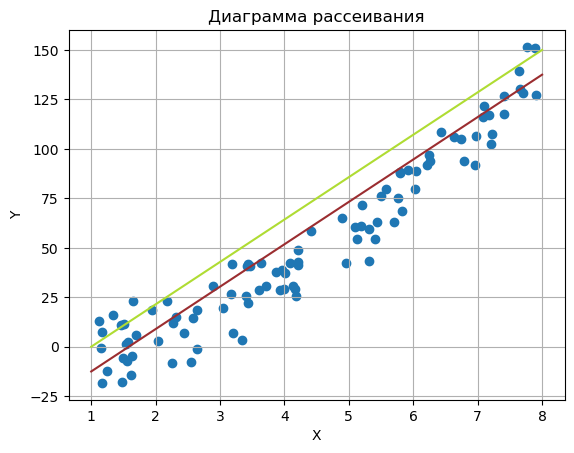

In [3]:
V = pd.read_excel(
    'Data_12_1.xlsx',header=0)
x = np.array(V['Вариант 18'].dropna())
y = np.array(V['Unnamed: 53'].dropna())

X_ = np.linspace(1,8,50)
Y = 21.428 * X_ -21.428
plt.plot(X_,Y,'#aFDC33')\

X_ = np.linspace(1,8,50)
Y = 21.428 * X_ -33.9285
plt.plot(X_,Y,'#9B2D30')


plt.scatter(x, y)  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеивания')
plt.grid(True)
plt.show()

#### Можно заметить, что зависимость отклоняется от линейной. В таком случае будем рассматривать модель: 
$Y = \beta_0 + \beta_1 x + \beta_2 x^2$

## ***Пункт 2***

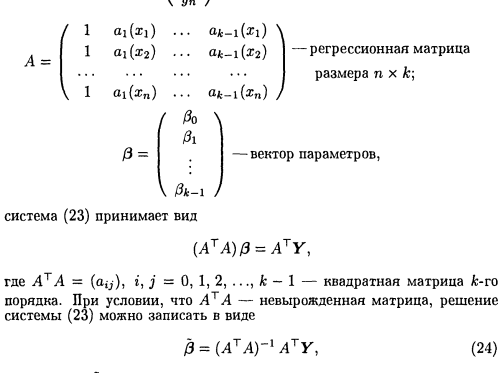

In [4]:
n = len(x)
          
# Создаем матрицу n на 3 заполненную нулями
A = np.zeros((n,3))

# Заполняем матрицу
for i in range(0, n):
    A[i] = [1, x[i], x[i]**2]

# Вектор коэфицентов бетта
betta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)

# Вывод коэффициентов регрессии
print(f"Ручки: betta_0: {betta[0]}, betta_1: {betta[1]} ,betta_2: {betta[2]}")

# Проверка: использование функции NumPy для нахождения коэффициентов полиномиальной регрессии
lap = np.polyfit(x, y, 2)
print(f"Готовая функция: betta_0: {lap[2]}, betta_1: {lap[1]} ,betta_2: {lap[0]}")

x_sort = sorted(x)
y1 = []
for i in x_sort:
    y1.append(betta[0] + betta[1] * i + betta[2] * i**2)

Ручки: betta_0: -8.013100778299732, betta_1: 3.3813339936453604 ,betta_2: 1.9424496282618593
Готовая функция: betta_0: -8.013100778301192, betta_1: 3.381333993645224 ,betta_2: 1.9424496282618753


## ***Пункт 3***

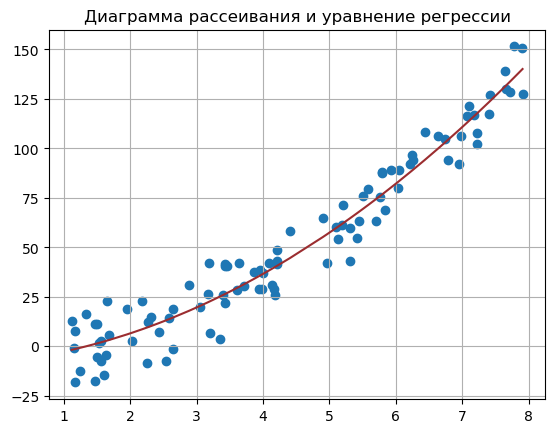

In [5]:
plt.plot(x_sort, y1, color='#9B2D30')
plt.scatter(x, y)
plt.title("Диаграмма рассеивания и уравнение регрессии")
plt.grid(True)
plt.show()

# Задание 2.

В предположении, что ошибки наблюдений не коррелированы и имеют нормальное распределение $N (0,\sigma)$, оцените качество аппроксимации результатов наблюдения уравнением регрессии  $y = \beta_0 + \beta_1 x + \beta_2 x^2 $ :

1) проверьте значимость модели на уровне $\alpha =0,05$;
2) найдите точечные оценки дисперсии ошибок наблюдений и ковариационной матрицы;
3) определите доверительные интервалы для параметров модели и дисперсии ошибок наблюдений при уровне значимости $\alpha =0,05$.

## ***Пункт 1***

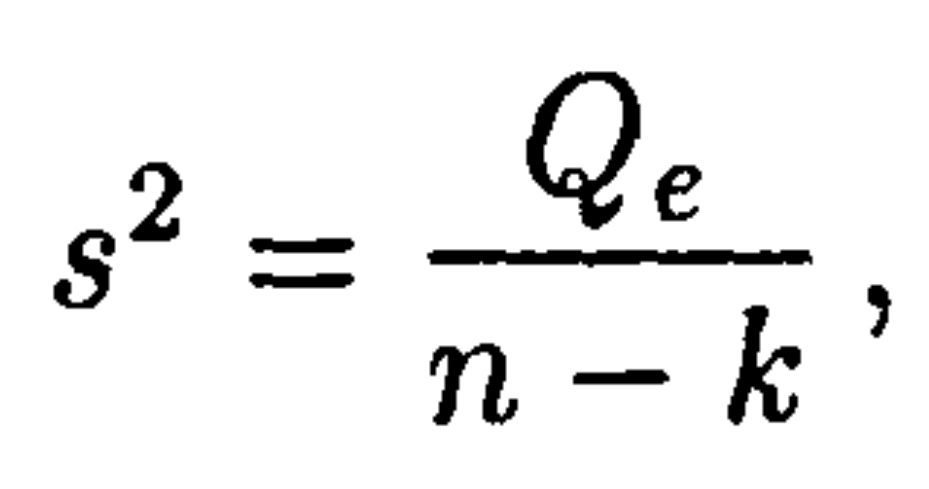

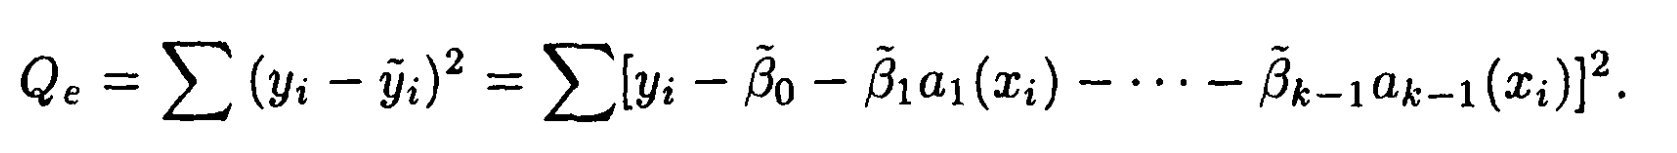

In [ ]:
k = 3

def Q_e(x, y):
    sum = 0
    for i in range(n):
        sum += (y[i] - (betta[0] + betta[1] * x[i] + betta[2] * x[i]**2))**2
    return sum  


S_2 = Q_e(x, y) / (n - k)

print(f"Остаточная дисперсия: S\u00B2 = {S_2}")

Остаточная дисперсия: S² =110.19256745599962


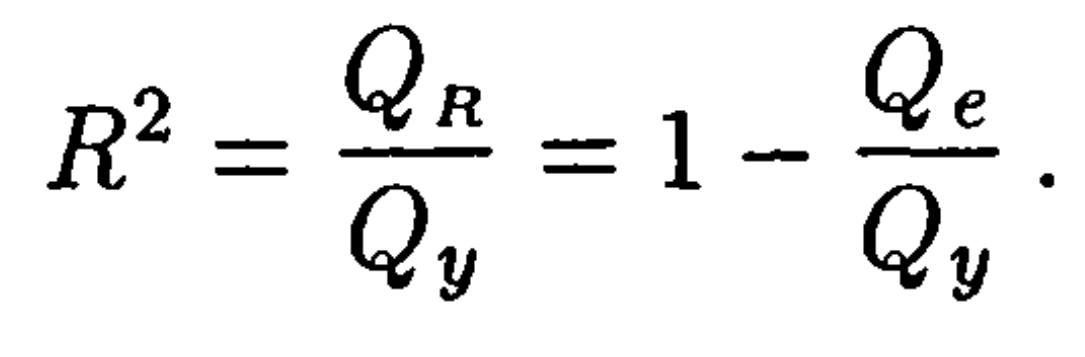

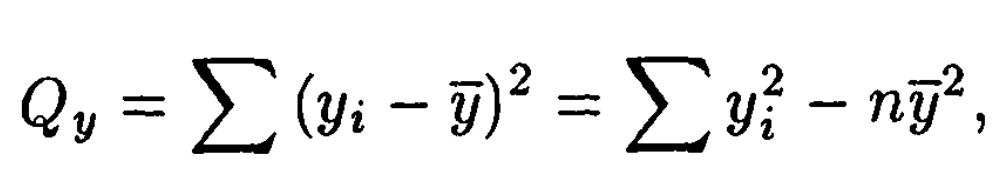

In [ ]:

def Q_y(y):
    summ = 0
    for i in range(len(y)):
        summ += (y[i] - np.mean(y))**2
    return summ


R_2 = 1 - Q_e(x, y) / Q_y(y)

print(f"R\u00B2 = {R_2}")

R² = 0.9442872713298754


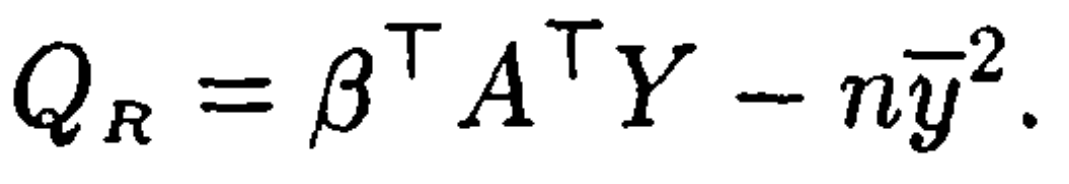

In [ ]:
def Q_R(betta, A, y):
    n = len(y)
    QR = np.dot(betta.T, np.dot(A.T, y)) - n * (np.mean(y))**2
    return QR

QR = Q_R(betta, A, y)
print(f"Q_R = {QR}")

Q_R = 175561.7340022367


In [19]:
alpha = 0.05

F = QR/((k-1)*S_2)
print(f"Fв = {F}")
F_cr = sts.f(k-1,n-k).ppf(1-alpha)
print("Fкр =",F_cr)

Fв = 796.6133200060852
Fкр = 3.0932659185772984


#### Так как значение статистики и критического значение не равны, то гипотеза значима

## ***Пункт 2***

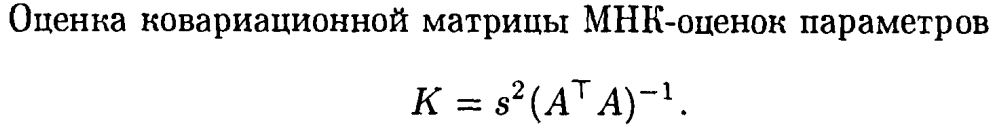

In [21]:
cov = S_2 * np.linalg.inv(np.dot(A.T, A))
print(f"Оценка ковариационной матрицы:\n{cov}")
print(f'Оценка дисперсии ошибок: {S_2}')

Оценка ковариационной матрицы:
[[ 24.6960246  -11.95979344   1.2281007 ]
 [-11.95979344   6.55055403  -0.71431463]
 [  1.2281007   -0.71431463   0.08124979]]
Оценка дисперсии ошибок: 110.19256745599962


## ***Пункт 3***

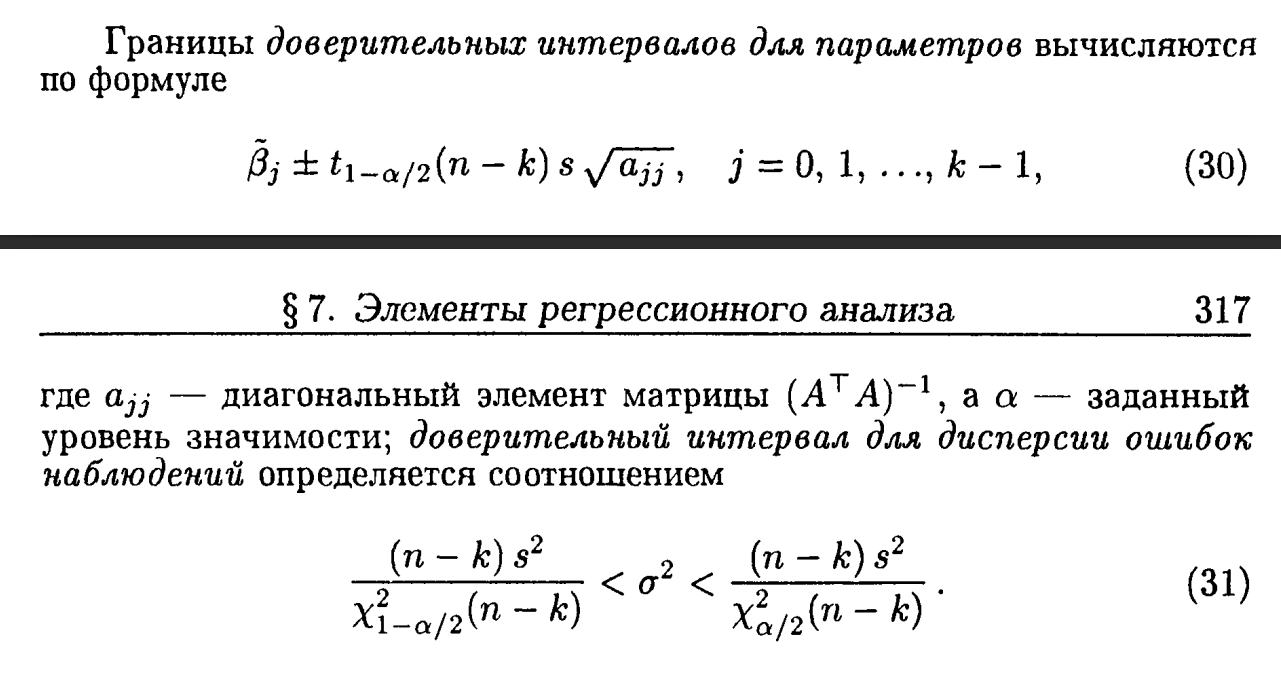

In [33]:
print("Доверительные интервалы для коэффициентов регрессии:")
t_value = sts.t(n - k).ppf(1 - alpha / 2)  # Квантиль распределения Стьюдента
a_i_j = np.linalg.inv(np.dot(A.T, A))
for i in range(3):
    G_left = betta[i] - t_value * (S_2**0.5) * (a_i_j[i, i]**0.5)
    G_right = betta[i] + t_value * (S_2**0.5) * (a_i_j[i, i]**0.5)
    print(f"b{i}: ({G_left}; {G_right})")

# Доверительные интервалы для дисперсии
G_left = (n - 3) * S_2 / sts.chi2(n - 3).ppf(1 - alpha / 2)
G_right = (n - 3) * S_2 / sts.chi2(n - 3).ppf(alpha / 2)

print(f'Доверительный интервал для дисперсии ошибок наблюдений\u2081 :\n ({G_left} < σ\u00B2 < {G_right})')

Доверительные интервалы для коэффициентов регрессии:
b0: (-17.880178370719094; 1.853976814119628)
b1: (-1.7004246584944172; 8.463092645785139)
b2: (1.3764891024863428; 2.5084101540373758)
Доверительный интервал для дисперсии ошибок наблюдений₁ :
 (84.40771114931921 < σ² < 149.9703434410949)
